# Data Visualization

In [1]:
# Experiment with barcrawl data
import numpy as np
import random
import pandas as pd
from pyts.image import GramianAngularField
from data_combined_reader import load_combined_data
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_TAC_LEVELS = 2
TEST_RATIO = 0.30
GAF_SIZE = 25

## Load Data

In [2]:
PIDS = [
    "BK7610",
    "BU4707",
    "CC6740",
    "DC6359",
    "DK3500",
    "HV0618",
    "JB3156",
    "JR8022",
    "MC7070",
    "MJ8002",
    "PC6771",
    "SA0297",
    "SF3079",
]

window, train_data_set, test_data_set = load_combined_data(PIDS, TEST_RATIO)

Xtr, Ftr, Ytr = zip(*train_data_set)
Xva, Ftr, Yva = zip(*test_data_set)

gasf = GramianAngularField(
    image_size=GAF_SIZE, sample_range=(0, 1), method="summation")

Reading in all data
Shuffle window data?: False
Sorting windows by timestamp
Number of Windows for Training: 92689
Number of Windows for Testing: 39736


In [3]:
print(len(Ytr) + len(Yva))
data_index = Ytr.index(1, 50000)
print(data_index)
data_index2 = Ytr.index(0, 60000)
print(data_index2)
pid = "DC6359"

132425
50004
60000


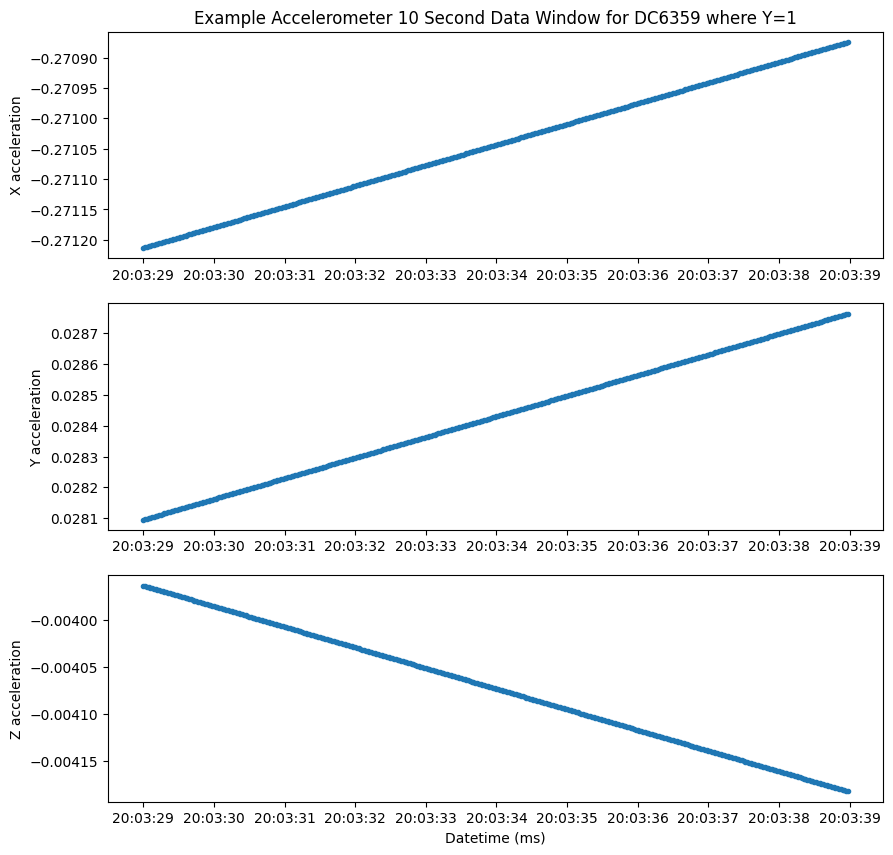

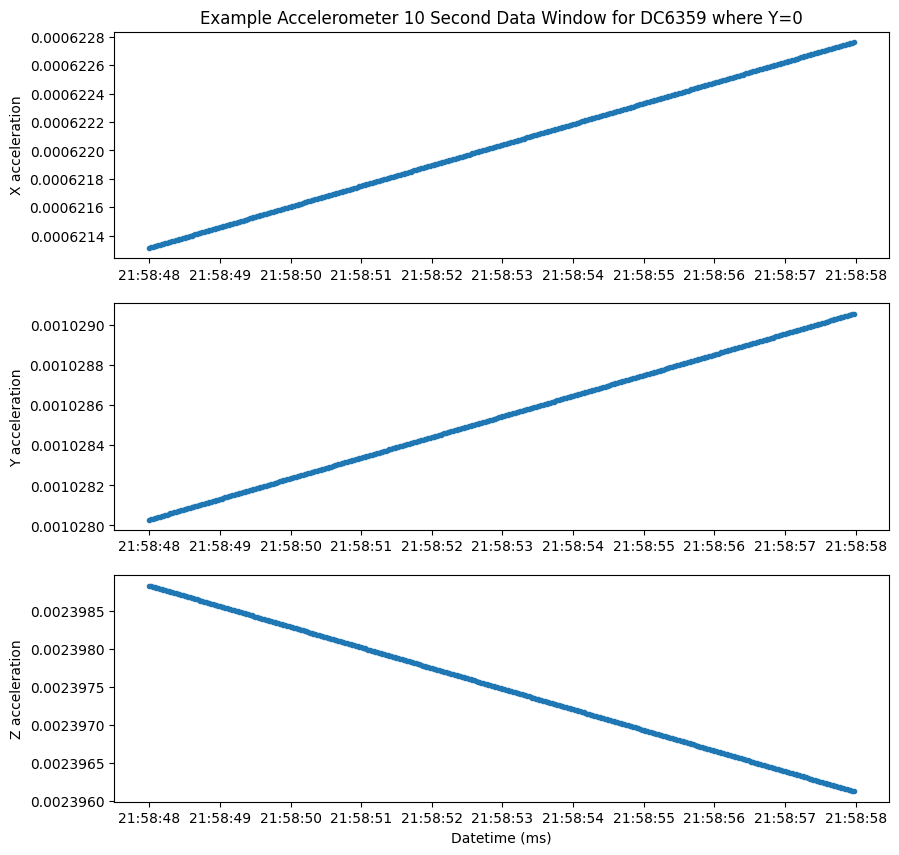

In [4]:
def plot_acc_readings(data: np.ndarray, pid: str, label: int):
    """
    Plot x, y, z accelerations for given pid over time.
    Save plot.
    """
    datetime = pd.to_datetime(data[:, 0], unit="ms")

    x = data[:, 1]
    y = data[:, 2]
    z = data[:, 3]

    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.title(
        f"Example Accelerometer 10 Second Data Window for {pid} where Y={label}")
    plt.plot(datetime, x, ".-")
    plt.ylabel("X acceleration")

    plt.subplot(3, 1, 2)
    plt.plot(datetime, y, ".-")
    plt.ylabel("Y acceleration")

    plt.subplot(3, 1, 3)
    plt.plot(datetime, z, ".-")
    plt.xlabel("Datetime (ms)")
    plt.ylabel("Z acceleration")


# Plot accelerometer readings
plot_acc_readings(Xtr[data_index], pid, 1)
plot_acc_readings(Xtr[data_index2], pid, 0)

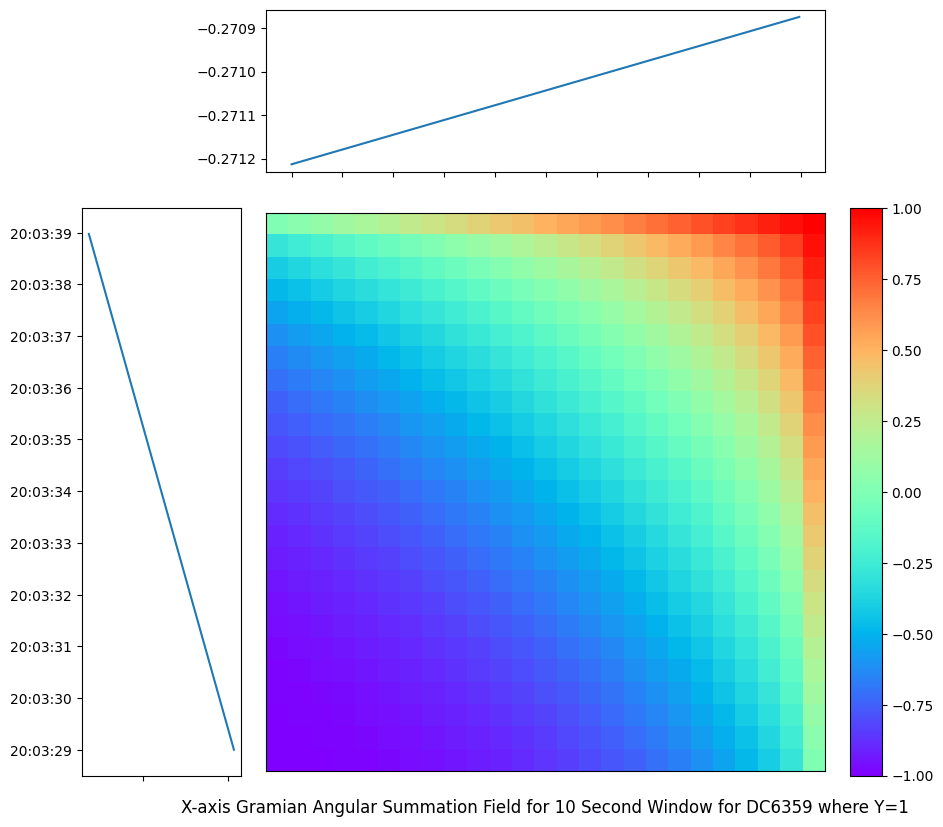

In [44]:
def plot_gasf(data: np.ndarray, pid: str):
    # Compute the GASF for x accelerometer data
    time_points = pd.to_datetime(data[:, 0], unit="ms")
    x = data[:, 1].T
    data_gasf_x = gasf.transform(np.array([x]))

    # Plot the time series and its recurrence plot
    width_ratios = (2, 7, 0.4)
    height_ratios = (2, 7)
    width = 10
    height = width * sum(height_ratios) / sum(width_ratios)
    fig = plt.figure(figsize=(width, height))
    gs = fig.add_gridspec(
        2,
        3,
        width_ratios=width_ratios,
        height_ratios=height_ratios,
        left=0.1,
        right=0.9,
        bottom=0.1,
        top=0.9,
        wspace=0.1,
        hspace=0.1,
    )

    # Plot the time series on the left with inverted axes
    ax_left = fig.add_subplot(gs[1, 0])
    ax_left.plot(x, time_points)
    ax_left.set_xticklabels([])
    ax_left.invert_xaxis()

    # Plot the time series on the top
    ax_top1 = fig.add_subplot(gs[0, 1])
    ax_top1.plot(time_points, x)
    ax_top1.set_xticklabels([])

    # Plot the Gramian angular fields on the bottom right
    ax_gasf = fig.add_subplot(gs[1, 1])
    ax_gasf.set_xticks([])
    ax_gasf.set_yticks([])
    im = ax_gasf.imshow(
        data_gasf_x[0],
        cmap="rainbow",
        origin="lower",
        extent=[0, 4 * np.pi, 0, 4 * np.pi],
    )
    ax_gasf.set_title(
        "X-axis Gramian Angular Summation Field for 10 Second Window for %s where Y=1"
        % pid,
        y=-0.09,
    )

    # Add colorbar
    ax_cbar = fig.add_subplot(gs[1, 2])
    fig.colorbar(im, cax=ax_cbar)


# Plot GASF
plot_gasf(Xtr[data_index], pid)